In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from os import listdir
from os.path import isdir, isfile, join
from torch.ut1ils.data import DataLoader
from jamo import text_to_tokens, tokens_to_text, n_symbols, refine_ksponspeech

### KsponSpeech 리스트 만들기

In [3]:
def get_file_list(root_dir):
    file_list = []
    files = [join(root_dir, f) for f in listdir(root_dir) if join(root_dir, f)]
    for file in files:
        if isdir(file):
            ret_list = get_file_list(file)
            file_list.extend(ret_list)
        elif isfile(file):
            if file.endswith('txt'):
                pcm_file = file[:-3] + 'pcm'
                file_list.append({'txt': file, 'pcm': pcm_file})

    return file_list

file_list = get_file_list('/data/KsponSpeech')
print('file 갯수 :', len(file_list))
for file in file_list[:5]:
    print(file)

file 갯수 : 622545
{'txt': '/data/KsponSpeech/KsponSpeech_01/KsponSpeech_0011/KsponSpeech_010694.txt', 'pcm': '/data/KsponSpeech/KsponSpeech_01/KsponSpeech_0011/KsponSpeech_010694.pcm'}
{'txt': '/data/KsponSpeech/KsponSpeech_01/KsponSpeech_0011/KsponSpeech_010360.txt', 'pcm': '/data/KsponSpeech/KsponSpeech_01/KsponSpeech_0011/KsponSpeech_010360.pcm'}
{'txt': '/data/KsponSpeech/KsponSpeech_01/KsponSpeech_0011/KsponSpeech_010406.txt', 'pcm': '/data/KsponSpeech/KsponSpeech_01/KsponSpeech_0011/KsponSpeech_010406.pcm'}
{'txt': '/data/KsponSpeech/KsponSpeech_01/KsponSpeech_0011/KsponSpeech_010019.txt', 'pcm': '/data/KsponSpeech/KsponSpeech_01/KsponSpeech_0011/KsponSpeech_010019.pcm'}
{'txt': '/data/KsponSpeech/KsponSpeech_01/KsponSpeech_0011/KsponSpeech_010508.txt', 'pcm': '/data/KsponSpeech/KsponSpeech_01/KsponSpeech_0011/KsponSpeech_010508.pcm'}


### txt 파일 보기

In [4]:
file = file_list[0]['txt']
with open(file, 'r', encoding='cp949') as f:
    l = f.read()
    print(l)

그거랑 또 달라. 그리고 또 그이 형법이 또 와/ b/ 너무 열 받더라고 그리고 이제 내가 인강+ 인강도 듣고, 혼자 하니까. 방법을 모르니까. 통으로 외우는 거야. b/ 그러니까 시간이 너무 오래 걸려. 나 아직 반도+ 반에 반도 못 했을걸?



###  텍스트 정제하기

In [5]:
l = refine_ksponspeech(l)
print(l)    

그거랑 또 달라. 그리고 또 그이 형법이 또 와 너무 열 받더라고 그리고 이제 내가 인강 인강도 듣고, 혼자 하니까. 방법을 모르니까. 통으로 외우는 거야. 그러니까 시간이 너무 오래 걸려. 나 아직 반도 반에 반도 못 했을걸?


### token으로 바꾸기

In [6]:
tokens = text_to_tokens(l)
print(tokens)

[257 295 256 257 289 256 260 287 264 256  32 272 291 256  32 259 287 260
 256 260 287 256  46  32 257 295 256 260 296 256 257 291 256  32 272 291
 256  32 257 295 256 264 296 256  32 270 290 264 256 262 289 262 256 264
 296 256  32 272 291 256  32 264 301 256  32 258 289 256 261 293 256  32
 264 290 260 256  32 262 287 259 256 259 289 256 260 287 256 257 291 256
  32 257 295 256 260 296 256 257 291 256  32 264 296 256 265 299 256  32
 258 297 256 257 287 256  32 264 296 258 256 257 287 264 256  32 264 296
 258 256 257 287 264 256 259 291 256  32 259 295 259 256 257 291 256  44
  32 270 291 258 256 265 287 256  32 270 287 256 258 296 256 271 287 256
  46  32 262 287 264 256 262 289 262 256 264 295 260 256  32 261 291 256
 260 295 256 258 296 256 271 287 256  46  32 268 291 264 256 264 295 256
 260 291 256  32 264 303 256 264 293 256 258 295 258 256  32 257 289 256
 264 288 256  46  32 257 295 256 260 289 256 258 296 256 271 287 256  32
 263 296 256 257 287 258 256 264 296 256  32 258 28

### SOS, EOS 추가하기 (optional)

In [7]:
tokens = np.pad(tokens, (1, 1), 'constant', constant_values=(0, 0))
print(tokens)

[  0 257 295 256 257 289 256 260 287 264 256  32 272 291 256  32 259 287
 260 256 260 287 256  46  32 257 295 256 260 296 256 257 291 256  32 272
 291 256  32 257 295 256 264 296 256  32 270 290 264 256 262 289 262 256
 264 296 256  32 272 291 256  32 264 301 256  32 258 289 256 261 293 256
  32 264 290 260 256  32 262 287 259 256 259 289 256 260 287 256 257 291
 256  32 257 295 256 260 296 256 257 291 256  32 264 296 256 265 299 256
  32 258 297 256 257 287 256  32 264 296 258 256 257 287 264 256  32 264
 296 258 256 257 287 264 256 259 291 256  32 259 295 259 256 257 291 256
  44  32 270 291 258 256 265 287 256  32 270 287 256 258 296 256 271 287
 256  46  32 262 287 264 256 262 289 262 256 264 295 260 256  32 261 291
 256 260 295 256 258 296 256 271 287 256  46  32 268 291 264 256 264 295
 256 260 291 256  32 264 303 256 264 293 256 258 295 258 256  32 257 289
 256 264 288 256  46  32 257 295 256 260 289 256 258 296 256 271 287 256
  32 263 296 256 257 287 258 256 264 296 256  32 25

### Pytorch dataset 만들기

In [8]:
class KSponSpeechDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir):
        self.file_list = self._get_file_list(root_dir)
        print(len(self.file_list))
        
    def _get_file_list(self, root_dir):
        file_list = []
        files = [join(root_dir, f) for f in listdir(root_dir) if join(root_dir, f)]
        for file in files:
            if isdir(file):
                ret_list = self._get_file_list(file)
                file_list.extend(ret_list)
            elif isfile(file):
                if file.endswith('txt'):
                    pcm_file = file[:-3] + 'pcm'
                    file_list.append({'txt': file, 'pcm': pcm_file})

        return file_list
    
    def _get_audio(self, file):
        with open(file, 'rb') as f:
            wav = np.fromfile(f, dtype=np.int16)
            wav = wav / 32768.
            S = librosa.feature.melspectrogram(wav, sr=16000, n_fft=1024, n_mels=80, hop_length=256)
            S = (np.log10(S + 1e-5) - np.log10(1e-5)) / -np.log10(1e-5)
            
        return S.T
            
    def _get_text(self, file):
        with open(file, 'r', encoding='cp949') as f:
            l = f.read()
            l = refine_ksponspeech(l)
            array = text_to_tokens(l)
        array = np.pad(array, (1, 1), 'constant', constant_values=(0, 0))
        return array
        
    def __getitem__(self, index):
        while True:
            text = self._get_text(self.file_list[index]['txt'])
            if len(text) > 180:
                index = (index + 1) % self.__len__()
                continue

            audio = self._get_audio(self.file_list[index]['pcm'])    
            if len(audio) > 450:
                index = (index + 1) % self.__len__()
                continue
                
            break
        
        return torch.FloatTensor(audio), torch.LongTensor(text)
        
    def __len__(self):
        return len(self.file_list)
    
class DataCollate():
    def __call__(self, batch):
        audio_lengths = []
        text_lengths = []
        for audio, text in batch:
            audio_lengths.append(len(audio))
            text_lengths.append(len(text))
            
        audio_max_length = max(audio_lengths)
        text_max_length = max(text_lengths)
        
        audio_padded = torch.FloatTensor(len(batch), audio_max_length, 80)
        audio_padded.zero_()
        audio_lengths = torch.from_numpy(np.array(audio_lengths)).long()
        
        text_padded = torch.LongTensor(len(batch), text_max_length)
        text_padded.zero_()
        text_lengths = torch.from_numpy(np.array(text_lengths)).long()
        
        for i, (audio, text) in enumerate(batch):
            audio_padded[i, :len(audio)] = audio
            text_padded[i, :len(text)] = text
            
        outputs = {'audio': audio_padded,
                   'audio_lengths': audio_lengths,
                   'text': text_padded,
                   'text_lengths': text_lengths
                  }
        
        return outputs

In [9]:
dataset = KSponSpeechDataset(root_dir='/data/KsponSpeech')
train_loader = DataLoader(dataset, num_workers=8, shuffle=True, batch_size=64, collate_fn=DataCollate())
print(train_loader)

622545


### batch data 보기

In [14]:
for batch in train_loader:
    audio = batch['audio'].data.cpu().numpy()
    audio_lengths = batch['audio_lengths'].data.cpu().numpy()
    text = batch['text'].data.cpu().numpy()
    text_lengths = batch['text_lengths'].data.cpu().numpy()
    break

(64, 423, 80)


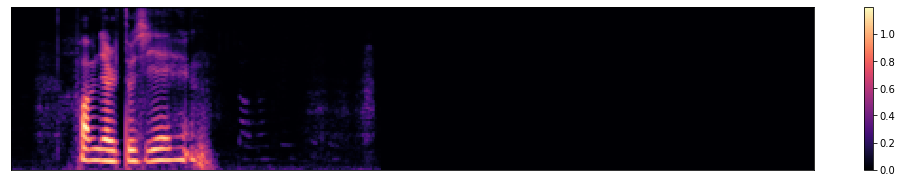

In [23]:
print(audio.shape)
plt.figure(figsize=[18, 3])
librosa.display.specshow(audio[0].T)
plt.colorbar()
plt.show()

In [25]:
print(audio_lengths.shape)
print(audio_lengths)

(64,)
[195  88 213 200 298 105 151 264 269 135  94 117 171 295 160  80 314 286
 103 167 230 170 337 169 261 257 214 166 337 377 322 127 130 317 120 395
 326 383 317 415 420 410 407 364 199 223 146 163 423 131 209 129 134  73
 405 191 215 221 227 248  80 115 161 163]


In [26]:
print(text.shape)
print(text[0])

(64, 145)
[  0 262 287 261 256  32 264 290 260 256 259 293 256 263 296 256 264 299
 256  63   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0]


In [27]:
print(text_lengths.shape)
print(text_lengths)

(64,)
[ 21  17  31  67  76  10  59  47  43  41  31  24  65  85  57  15  59  60
  27  42 116  42  80  38  64  53  62  46  97  75  77  49  40  62  32 110
  86 125 145  34  41 126 130  76  60  87  52  74 129  42  46  28  30  14
  82  24  94  24  25  77  17  18  61  54]
